# Which genres are most beneficial or detrimental to the different MH disorders included in this study?

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

In [72]:
data_path="../Data_Cleaning/output_cleaned_data.csv"
data= pd.read_csv(data_path)
data.head()

,Age,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4.0,No,Video game music,132.0,Never,Never,Very frequently,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,2.5,Yes,Jazz,84.0,Sometimes,Never,Never,Rarely,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,4.0,Yes,R&B,107.0,Never,Never,Rarely,Never,Rarely,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,5.0,Yes,Jazz,86.0,Rarely,Sometimes,Never,Never,Never,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,3.0,Yes,Video game music,66.0,Sometimes,Never,Rarely,Sometimes,Rarely,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [73]:
cols= ["Age","Hours per day", "Fav genre", "Music effects"]
df=data[cols]
df.dropna()

,Age,Hours per day,Fav genre,Music effects
0,18.0,4.0,Video game music,No effect
1,61.0,2.5,Jazz,Improve
2,18.0,4.0,R&B,Improve
3,18.0,5.0,Jazz,Improve
4,18.0,3.0,Video game music,Improve
...,...,...,...,...
718,17.0,2.0,Rock,Improve
719,18.0,1.0,Pop,Improve
720,19.0,6.0,Rap,Improve
721,19.0,5.0,Classical,Improve


In [74]:
#hours_data2=df["Hours per day"].value_counts()
#hours_data2.groupby(["Fav genre"]).size()

In [75]:
#Age groups
bins = [0, 30, 40, 50, 60, 100]
labels= ['<20', '20-39', '40-49', '50-59', '60+']

In [76]:
df["Age_Group"]=pd.cut(df["Age"], bins=bins, labels=labels)
df.head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\3095956844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_Group"]=pd.cut(df["Age"], bins=bins, labels=labels)


,Age,Hours per day,Fav genre,Music effects,Age_Group
0,18.0,4.0,Video game music,No effect,<20
1,61.0,2.5,Jazz,Improve,60+
2,18.0,4.0,R&B,Improve,<20
3,18.0,5.0,Jazz,Improve,<20
4,18.0,3.0,Video game music,Improve,<20


In [77]:
df.info()
df['Age'] = df['Age'].astype(object)
df['Hours per day'] = df['Hours per day'].astype(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            723 non-null    float64 
 1   Hours per day  723 non-null    float64 
 2   Fav genre      723 non-null    object  
 3   Music effects  723 non-null    object  
 4   Age_Group      723 non-null    category
dtypes: category(1), float64(2), object(2)
memory usage: 23.6+ KB


C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\2254734131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(object)
C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\2254734131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hours per day'] = df['Hours per day'].astype(object)


In [78]:
music_results=df["Music effects"].value_counts()
music_results

Music effects
Improve      539
No effect    167
Worsen        17
Name: count, dtype: int64

In [79]:
improve_data=df.loc[(df["Music effects"] =="Improve")]
improve_data_count=improve_data.groupby(["Fav genre"]).size()
improve_data_count.sort_values(ascending=False)

Fav genre
Rock                125
Pop                  85
Metal                67
Classical            39
EDM                  30
Hip hop              30
R&B                  26
Video game music     26
Folk                 23
Country              20
K pop                19
Jazz                 16
Rap                  16
Lofi                 10
Gospel                6
Latin                 1
dtype: int64

In [80]:
no_effect_data=df.loc[(df["Music effects"] =="No effect")]
no_effect_data_count=no_effect_data.groupby(["Fav genre"]).size()
no_effect_data_count.sort_values(ascending=False)

Fav genre
Rock                53
Pop                 25
Metal               21
Classical           13
Video game music    13
R&B                  9
EDM                  6
Folk                 6
Country              5
Hip hop              4
Jazz                 4
K pop                4
Rap                  3
Latin                1
dtype: int64

In [81]:
worsen_data=df.loc[(df["Music effects"] =="Worsen")]
worsen_data_count=worsen_data.groupby(["Fav genre"]).size()
worsen_data_count.sort_values(ascending=False)

Fav genre
Rock                7
Pop                 4
Video game music    4
Classical           1
Rap                 1
dtype: int64

In [82]:
line_data=pd.DataFrame({
    "Improve": improve_data_count,
    "No Effect": no_effect_data_count,
    "Worsen": worsen_data_count,
   
#"Hours per day": hours_per_day
})

In [83]:
cols2=["Age_Group","Hours per day", "Fav genre","Music effects"]
df3=df[cols2]
df4=df3.dropna() #set_index(["Age_Group"])
df4.groupby(df4.Age_Group)
df4.sort_values(by="Hours per day", ascending=False)

C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\1758699745.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df4.groupby(df4.Age_Group)


,Age_Group,Hours per day,Fav genre,Music effects
284,<20,20.0,Rock,No effect
713,<20,18.0,EDM,Improve
340,<20,16.0,Jazz,Improve
476,50-59,15.0,Rock,No effect
352,<20,15.0,EDM,Improve
...,...,...,...,...
627,<20,0.0,Metal,Improve
53,40-49,0.0,Rock,No effect
642,40-49,0.0,Rock,No effect
378,<20,0.0,Video game music,No effect


In [84]:
df4["Music effects"].value_counts()

Music effects
Improve      539
No effect    167
Worsen        17
Name: count, dtype: int64

In [85]:
#hours_per=df4["Hours per day"]

hours_per_day=df4.groupby(["Age_Group"]).size()

hours_per_day


C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\762290760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_per_day=df4.groupby(["Age_Group"]).size()


Age_Group
<20      577
20-39     76
40-49     26
50-59     26
60+       18
dtype: int64

In [86]:

improve_data_hours=improve_data.groupby(["Hours per day"]).size()
improve_data_hours.sort_values(ascending=False)

Hours per day
2.00     126
3.00      85
1.00      79
4.00      70
5.00      44
6.00      34
8.00      22
10.00     16
0.50      14
7.00      14
1.50      10
12.00      6
2.50       6
9.00       3
0.00       2
0.25       2
11.00      1
0.70       1
13.00      1
15.00      1
16.00      1
18.00      1
dtype: int64

In [87]:
no_effect_data_hours=no_effect_data.groupby(["Hours per day"]).size()
no_effect_data_hours.sort_values(ascending=False)

Hours per day
2.00     41
1.00     32
3.00     30
4.00     12
6.00     12
5.00      9
8.00      7
0.50      5
1.50      4
10.00     4
0.00      3
12.00     2
15.00     1
14.00     1
4.50      1
0.10      1
0.25      1
20.00     1
dtype: int64

In [88]:
worsen_data_hours=worsen_data.groupby(["Hours per day"]).size()
worsen_data_hours.sort_values(ascending=False)

Hours per day
1.0     4
2.0     4
3.0     2
0.0     1
0.5     1
1.5     1
4.0     1
5.0     1
6.0     1
12.0    1
dtype: int64

In [89]:
hours_data_count=pd.DataFrame({
    "Improve": improve_data_hours,
    "No Effect":no_effect_data_hours,
    "Worsen": worsen_data_hours,

})
data_hours=hours_data_count.dropna()
data_hours

,Improve,No Effect,Worsen
Hours per day,,,
0.0,2.0,3.0,1.0
0.5,14.0,5.0,1.0
1.0,79.0,32.0,4.0
1.5,10.0,4.0,1.0
2.0,126.0,41.0,4.0
3.0,85.0,30.0,2.0
4.0,70.0,12.0,1.0
5.0,44.0,9.0,1.0
6.0,34.0,12.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

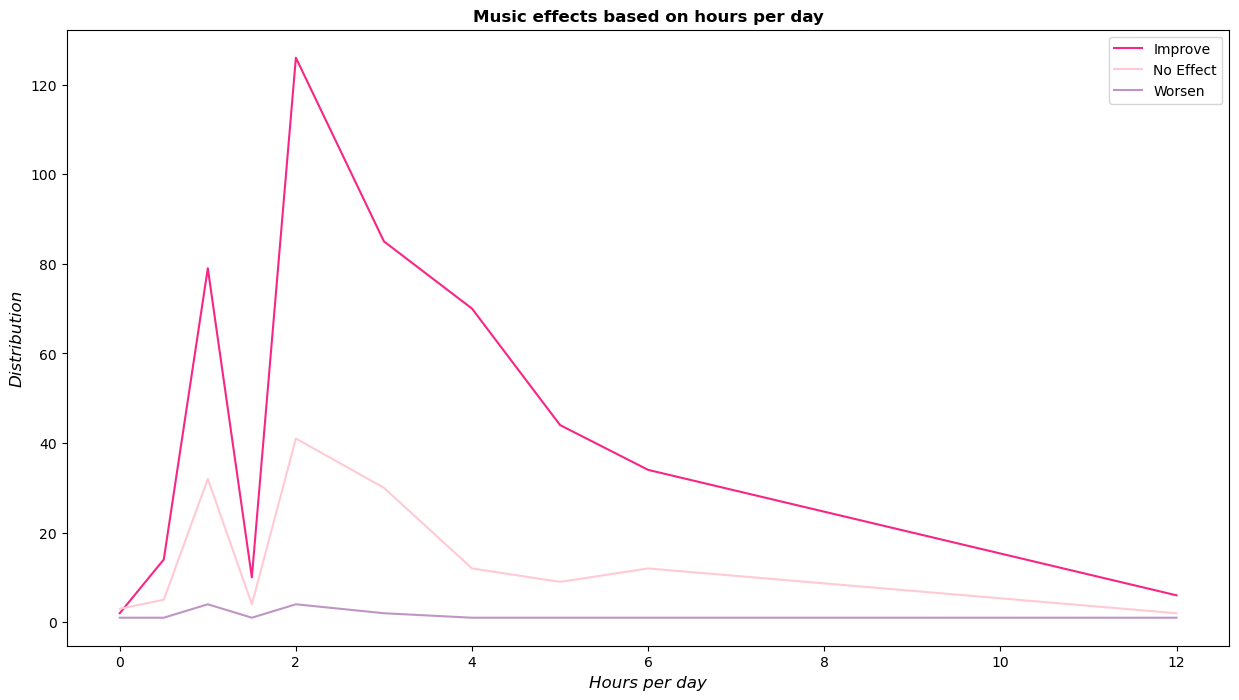

In [113]:
data_hours.plot(figsize=(15, 8),color=['#f72585', "#ffcad4", "#be95c4"])
plt.xlabel("Hours per day", fontsize=12, fontstyle="italic")
plt.ylabel("Distribution", fontsize=12, fontstyle="italic")
plt.title("Music effects based on hours per day", fontsize=12, fontweight="bold")
plt.savefig("Data_graphics/music_effects_vs_age")
plt.show

In [91]:
positive=improve_data.groupby(["Age_Group"]).size()
nothing=no_effect_data.groupby(["Age_Group"]).size()
negative=worsen_data.groupby(["Age_Group"]).size()
hours_effect=pd.DataFrame({
    "Improve": positive,
    "No Effect": nothing,
    "Worsen": negative,
    "Hours": hours_per_day
})


hours_data=hours_effect.sort_values(by="Age_Group",ascending=True)
hours_data

C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\1429919284.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  positive=improve_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\1429919284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nothing=no_effect_data.groupby(["Age_Group"]).size()
C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\1429919284.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

,Improve,No Effect,Worsen,Hours
Age_Group,,,,
<20,441,124,12,577
20-39,45,26,5,76
40-49,19,7,0,26
50-59,18,8,0,26
60+,16,2,0,18


In [93]:

effects_data=pd.DataFrame({
    "Improve": improve_data_count,
    "No Effect": no_effect_data_count,
    "Worsen": worsen_data_count,
#"Hours per day": hours_per_day
})

organize_data=effects_data.sort_values(by= "Improve",ascending=False)

organize_data.fillna(0, inplace=True)

organize_data["Total"]=organize_data["Improve"] + organize_data["No Effect"]+ organize_data["Worsen"]
#for index, row in organize_data.iterrows():
     #total = sum(row)
    #organize_data.at[index, 'Total'] = total

#organize_data.fillna(0, inplace=True)
organize_data

,Improve,No Effect,Worsen,Total
Fav genre,,,,
Rock,125,53.0,7.0,185.0
Pop,85,25.0,4.0,114.0
Metal,67,21.0,0.0,88.0
Classical,39,13.0,1.0,53.0
EDM,30,6.0,0.0,36.0
Hip hop,30,4.0,0.0,34.0
R&B,26,9.0,0.0,35.0
Video game music,26,13.0,4.0,43.0
Folk,23,6.0,0.0,29.0


In [94]:
organize_data["Improve"].mean()

33.6875

In [95]:
organize_data["% Improve"]=(organize_data["Improve"]/ organize_data['Total']) * 100
organize_data["% No Effect"]=(organize_data["No Effect"]/ organize_data['Total']) * 100
organize_data["% Worsen"]=(organize_data["Worsen"]/ organize_data['Total']) * 100

organize_data

,Improve,No Effect,Worsen,Total,% Improve,% No Effect,% Worsen
Fav genre,,,,,,,
Rock,125,53.0,7.0,185.0,67.567568,28.648649,3.783784
Pop,85,25.0,4.0,114.0,74.561404,21.929825,3.508772
Metal,67,21.0,0.0,88.0,76.136364,23.863636,0.000000
Classical,39,13.0,1.0,53.0,73.584906,24.528302,1.886792
EDM,30,6.0,0.0,36.0,83.333333,16.666667,0.000000
Hip hop,30,4.0,0.0,34.0,88.235294,11.764706,0.000000
R&B,26,9.0,0.0,35.0,74.285714,25.714286,0.000000
Video game music,26,13.0,4.0,43.0,60.465116,30.232558,9.302326
Folk,23,6.0,0.0,29.0,79.310345,20.689655,0.000000


In [96]:
organize_data

,Improve,No Effect,Worsen,Total,% Improve,% No Effect,% Worsen
Fav genre,,,,,,,
Rock,125,53.0,7.0,185.0,67.567568,28.648649,3.783784
Pop,85,25.0,4.0,114.0,74.561404,21.929825,3.508772
Metal,67,21.0,0.0,88.0,76.136364,23.863636,0.000000
Classical,39,13.0,1.0,53.0,73.584906,24.528302,1.886792
EDM,30,6.0,0.0,36.0,83.333333,16.666667,0.000000
Hip hop,30,4.0,0.0,34.0,88.235294,11.764706,0.000000
R&B,26,9.0,0.0,35.0,74.285714,25.714286,0.000000
Video game music,26,13.0,4.0,43.0,60.465116,30.232558,9.302326
Folk,23,6.0,0.0,29.0,79.310345,20.689655,0.000000


In [97]:
columns=[ "% Improve", "% No Effect", "% Worsen"]
percentage_data=organize_data[columns]

rounded_up=percentage_data.map(round, ndigits=None)
rounded_up


,% Improve,% No Effect,% Worsen
Fav genre,,,
Rock,68,29,4
Pop,75,22,4
Metal,76,24,0
Classical,74,25,2
EDM,83,17,0
Hip hop,88,12,0
R&B,74,26,0
Video game music,60,30,9
Folk,79,21,0


In [98]:

#rounded_up["% Improve"]=rounded_up["% Improve"].map("%{:,.2f}".format)
#rounded_up["% No Effect"]=rounded_up["% No Effect"].map("%{:,}".format)
#rounded_up["% Worsen"]=rounded_up["% Worsen"].map("%{:,}".format)
#fixed=rounded_up
#fixed

In [99]:
filter=rounded_up.loc[(organize_data["Improve"] >=26)]
filtered=filter.sort_values(by="% Improve", ascending= False)
filtered

,% Improve,% No Effect,% Worsen
Fav genre,,,
Hip hop,88,12,0
EDM,83,17,0
Metal,76,24,0
Pop,75,22,4
Classical,74,25,2
R&B,74,26,0
Rock,68,29,4
Video game music,60,30,9


In [100]:
updated=filtered["% Improve"].map("{:,}".format)
updated

Fav genre
Hip hop             88
EDM                 83
Metal               76
Pop                 75
Classical           74
R&B                 74
Rock                68
Video game music    60
Name: % Improve, dtype: object

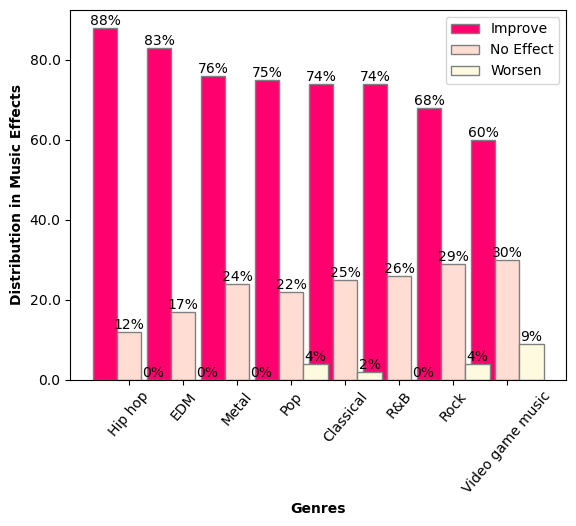

In [114]:
# Data from the table
genres = filtered.index
values=filtered.values.T


# Create a figure and axis      
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.45

# Set the position of the bars on the x-axis
r1 = range(len(genres))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]



# Plot the bars
bar1= plt.bar(r1,values[0], color='#ff006e', width=bar_width, edgecolor='grey', label='Improve')
bar2=plt.bar(r2,values[1], color= "#ffddd2", width=bar_width, edgecolor='grey', label='No Effect')
bar3=plt.bar(r3,values[2], color='#fefae0', width=bar_width, edgecolor='grey', label='Worsen')

# Add xticks on the middle of the group bars
plt.xlabel('Genres', fontweight='bold')
plt.ylabel("Distribution in Music Effects",fontweight='bold')
plt.savefig("Data_graphics/fav_genre_vs_music_effect")

plt.xticks([r + bar_width for r in range(len(genres))], genres, rotation=50)

# Convert Y-axis to percentage format
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(x))) 


# Add values on top of the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.0f}%'.format(height),
                ha='center', va='bottom')


# Add a legend
plt.legend()
plt.show()

In [102]:
genres = organize_data.index
genres

Index(['Rock', 'Pop', 'Metal', 'Classical', 'EDM', 'Hip hop', 'R&B',
       'Video game music', 'Folk', 'Country', 'K pop', 'Jazz', 'Rap', 'Lofi',
       'Gospel', 'Latin'],
      dtype='object', name='Fav genre')

In [103]:
fav_genre=df["Fav genre"].value_counts()
fav_genre

Fav genre
Rock                185
Pop                 114
Metal                88
Classical            53
Video game music     43
EDM                  36
R&B                  35
Hip hop              34
Folk                 29
Country              25
K pop                23
Jazz                 20
Rap                  20
Lofi                 10
Gospel                6
Latin                 2
Name: count, dtype: int64

In [104]:
cols2=["Age_Group","Hours per day", "Fav genre","Music effects"]
df3=df[cols2]
df4=df3.dropna().set_index(["Age_Group"])
df4.sort_values(by="Hours per day", ascending=False)

,Hours per day,Fav genre,Music effects
Age_Group,,,
<20,20.0,Rock,No effect
<20,18.0,EDM,Improve
<20,16.0,Jazz,Improve
50-59,15.0,Rock,No effect
<20,15.0,EDM,Improve
...,...,...,...
<20,0.0,Metal,Improve
40-49,0.0,Rock,No effect
40-49,0.0,Rock,No effect


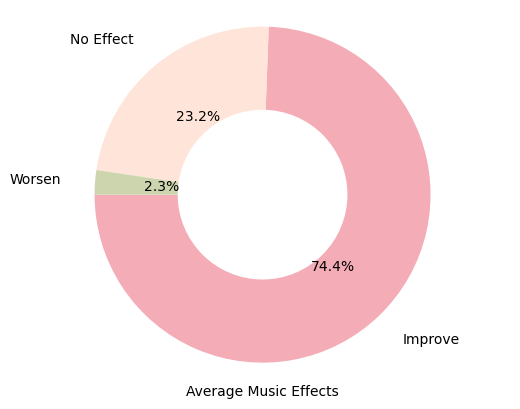

In [115]:
# Data for the pie chart
labels = ['Improve', 'No Effect', 'Worsen']
sizes = [108.2, 33.8, 3.4]
colors = ['#F4ACB7', '#FFE5D9', '#CCD5AE']  

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180, labeldistance=1.2, colors= colors)

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.5, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.xlabel('Average Music Effects')
plt.savefig("Data_graphics/average_music_effects")

# Display the donut chart
plt.show()

In [107]:
filtered

,% Improve,% No Effect,% Worsen
Fav genre,,,
Hip hop,88,12,0
EDM,83,17,0
Metal,76,24,0
Pop,75,22,4
Classical,74,25,2
R&B,74,26,0
Rock,68,29,4
Video game music,60,30,9


In [110]:
cols5=["% Improve",	"% No Effect", "% Worsen"]
filtered2=filtered[cols5]
filtered2

,% Improve,% No Effect,% Worsen
Fav genre,,,
Hip hop,88,12,0
EDM,83,17,0
Metal,76,24,0
Pop,75,22,4
Classical,74,25,2
R&B,74,26,0
Rock,68,29,4
Video game music,60,30,9


In [111]:
cols3=["Hours per day", "Fav genre","Music effects"]
line_data=data[cols3]
line_data["Improvement"]=organize_data["Improve"]
line_data

C:\Users\gabri\AppData\Local\Temp\ipykernel_16584\4008368708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_data["Improvement"]=organize_data["Improve"]


,Hours per day,Fav genre,Music effects,Improvement
0,4.0,Video game music,No effect,NaN
1,2.5,Jazz,Improve,NaN
2,4.0,R&B,Improve,NaN
3,5.0,Jazz,Improve,NaN
4,3.0,Video game music,Improve,NaN
...,...,...,...,...
718,2.0,Rock,Improve,NaN
719,1.0,Pop,Improve,NaN
720,6.0,Rap,Improve,NaN
721,5.0,Classical,Improve,NaN
